<a href="https://colab.research.google.com/github/yash2046/2216101_bootcamp_ml-concepts/blob/main/suv_all_classification_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/drive/MyDrive/SUV_Purchase.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


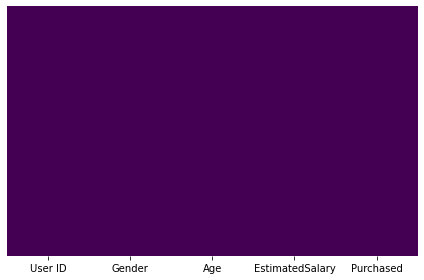

In [3]:
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [4]:
df = df.drop('User ID',axis=1) #x=x+1
df = df.drop('Gender',axis=1)
df.head(32)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [5]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()
data_scaled=df.iloc[:,:-1].values
data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)

In [6]:
data_scaled.head()

,0,1
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [7]:
data_scaled.columns=['Age','EstimatedSalary']
data_scaled.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [8]:
data_scaled['Purchased'] = df.Purchased
data_scaled

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0
...,...,...,...
395,0.797057,-0.844019,1
396,1.274623,-1.372587,1
397,1.179110,-1.460681,1
398,-0.158074,-1.078938,0


In [9]:
data_scaled = data_scaled[data_scaled['Purchased'].notna()]
data_scaled

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0
...,...,...,...
395,0.797057,-0.844019,1
396,1.274623,-1.372587,1
397,1.179110,-1.460681,1
398,-0.158074,-1.078938,0


In [10]:
import numpy as np
x=np.array(data_scaled[['EstimatedSalary','Age']])
y=np.array(data_scaled[['Purchased']])

In [11]:
#spliting the data  into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [12]:
from sklearn.naive_bayes import GaussianNB 
model=GaussianNB()

In [13]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [14]:
x_train

array([[ 2.15119598,  1.46564897],
       [ 0.06629116, -0.25358736],
       [ 2.32738512,  0.41500455],
       [-1.40195167,  0.70154394],
       [-0.55037082,  0.89257019],
       [ 0.30121002,  0.41500455],
       [ 1.06469629,  0.12846516],
       [-0.31545197,  0.03295203],
       [-0.19799255,  0.31949142],
       [-0.57973568, -0.15807423],
       [ 1.38770971, -0.54012675],
       [-1.1083031 , -1.30423178],
       [ 0.06629116, -1.11320552],
       [ 2.18056084,  0.89257019],
       [-1.07893824,  0.98808332],
       [ 1.7988177 ,  0.98808332],
       [ 0.30121002, -0.73115301],
       [ 0.18375059,  2.03872775],
       [-0.84401939,  0.79705706],
       [-0.34481683, -1.01769239],
       [ 1.24088543, -0.34910049],
       [ 0.35993973, -1.87731056],
       [-0.46227625, -1.01769239],
       [ 0.27184516, -1.20871865],
       [-1.37258681,  1.94321462],
       [ 1.91627713, -0.54012675],
       [-1.54877595, -1.11320552],
       [ 1.123426  ,  0.41500455],
       [ 0.12502088,

In [15]:
y_pred=model.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [16]:
print("Predicted value for training data:",model.score(x_train,y_train))
print("Training accuracy:",model.score(x_train,y_train)*100)

Predicted value for training data: 0.89375
Training accuracy: 89.375


In [17]:
print("Predicted value for testing data:",model.score(x_test,y_test))
print("Testing accuracy:",model.score(x_test,y_test)*100)

Predicted value for testing data: 0.8875
Testing accuracy: 88.75


In [18]:
accuracy=model.score(x,y)*100
print(accuracy)

89.25


In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[51  4]
 [ 5 20]]


0.8875

In [20]:
y_train=y_train.flatten()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'map'
  import sys
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


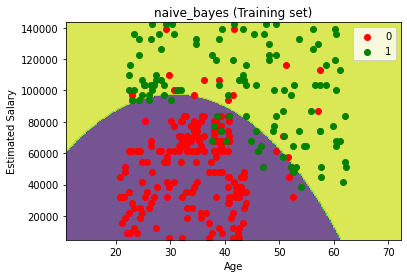

In [21]:
import matplotlib.pyplot as plt
from matplotlib. colors import ListedColormap
x_set, y_set = sst.inverse_transform(x_train),y_train
x1,x2 = np.meshgrid(np. arange(start = x_set[:, 0].min( )-10,stop= x_set[:, 0].max() + 10, step = 0.25) ,
np.arange(start = x_set[:, 1].min( )- 1000, stop = x_set[:, 1].max ( ) + 1000, step = 0.25))
plt. contourf(x1,x2,model.predict(sst.transform(np.array([x1.ravel(), x2.ravel()]). T) ).reshape (x1. shape ),
alpha = 0.75, map = ListedColormap(('red','green' )) )
plt. xlim(x1.min( ), x1.max( ))
plt.ylim(x2.min( ), x2. max( ))
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set ==j,1],c = ListedColormap(('red','green'))(i),label=j)
plt. title('naive_bayes (Training set)')
plt.xlabel('Age')
plt. ylabel('Estimated Salary')
plt. legend()
plt.show()

In [22]:
y_test=y_test.flatten()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'map'
  
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


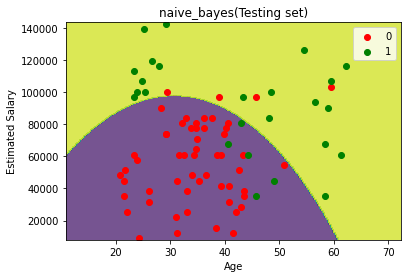

In [23]:
from matplotlib. colors import ListedColormap
x_set, y_set = sst.inverse_transform(x_test),y_test
x1,x2 = np.meshgrid(np. arange(start = x_set[:, 0].min( )-10,stop= x_set[:, 0].max() + 10, step = 0.25) ,
np.arange(start = x_set[:, 1].min( )- 1000, stop = x_set[:, 1].max ( ) + 1000, step = 0.25))
plt. contourf(x1,x2,model.predict(sst.transform(np.array([x1.ravel(), x2.ravel()]). T) ).reshape (x1. shape ),
alpha = 0.75, map = ListedColormap(('red','green' )) )
plt. xlim(x1.min( ), x1.max( ))
plt.ylim(x2.min( ), x2. max( ))
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set ==j,1],c = ListedColormap(('red','green'))(i),label=j)
plt. title('naive_bayes(Testing set)')
plt.xlabel('Age')
plt. ylabel('Estimated Salary')
plt. legend()
plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier
modeldt=DecisionTreeClassifier()

In [25]:
modeldt.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
x_train

array([[ 2.15,  1.47],
       [ 0.07, -0.25],
       [ 2.33,  0.42],
       [-1.4 ,  0.7 ],
       [-0.55,  0.89],
       [ 0.3 ,  0.42],
       [ 1.06,  0.13],
       [-0.32,  0.03],
       [-0.2 ,  0.32],
       [-0.58, -0.16],
       [ 1.39, -0.54],
       [-1.11, -1.3 ],
       [ 0.07, -1.11],
       [ 2.18,  0.89],
       [-1.08,  0.99],
       [ 1.8 ,  0.99],
       [ 0.3 , -0.73],
       [ 0.18,  2.04],
       [-0.84,  0.8 ],
       [-0.34, -1.02],
       [ 1.24, -0.35],
       [ 0.36, -1.88],
       [-0.46, -1.02],
       [ 0.27, -1.21],
       [-1.37,  1.94],
       [ 1.92, -0.54],
       [-1.55, -1.11],
       [ 1.12,  0.42],
       [ 0.13, -0.64],
       [-1.4 ,  0.8 ],
       [-0.67,  0.22],
       [ 0.39,  2.13],
       [-0.32, -0.92],
       [-0.99, -1.69],
       [-0.79, -0.35],
       [-1.46,  0.89],
       [ 0.3 ,  0.32],
       [ 0.36, -1.4 ],
       [ 0.3 ,  0.42],
       [ 0.36,  0.8 ],
       [-0.37,  0.22],
       [-0.34, -1.3 ],
       [-0.23, -0.06],
       [-1.

In [27]:
print("Predicted value for training data:",modeldt.score(x_train,y_train))
print("Training accuracy:",modeldt.score(x_train,y_train)*100)

Predicted value for training data: 0.99375
Training accuracy: 99.375


In [28]:
print("Predicted value for testing data:",modeldt.score(x_test,y_test))
print("Testing accuracy:",modeldt.score(x_test,y_test)*100)

Predicted value for testing data: 0.825
Testing accuracy: 82.5


In [29]:
accuracy=modeldt.score(x,y)*100
print(accuracy)

96.0


In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[51  4]
 [ 5 20]]


0.8875

In [31]:
from sklearn.svm import SVC
modelsvc=SVC()

In [32]:
modelsvc.fit(x_train,y_train)

SVC()

In [33]:
x_train

array([[ 2.15,  1.47],
       [ 0.07, -0.25],
       [ 2.33,  0.42],
       [-1.4 ,  0.7 ],
       [-0.55,  0.89],
       [ 0.3 ,  0.42],
       [ 1.06,  0.13],
       [-0.32,  0.03],
       [-0.2 ,  0.32],
       [-0.58, -0.16],
       [ 1.39, -0.54],
       [-1.11, -1.3 ],
       [ 0.07, -1.11],
       [ 2.18,  0.89],
       [-1.08,  0.99],
       [ 1.8 ,  0.99],
       [ 0.3 , -0.73],
       [ 0.18,  2.04],
       [-0.84,  0.8 ],
       [-0.34, -1.02],
       [ 1.24, -0.35],
       [ 0.36, -1.88],
       [-0.46, -1.02],
       [ 0.27, -1.21],
       [-1.37,  1.94],
       [ 1.92, -0.54],
       [-1.55, -1.11],
       [ 1.12,  0.42],
       [ 0.13, -0.64],
       [-1.4 ,  0.8 ],
       [-0.67,  0.22],
       [ 0.39,  2.13],
       [-0.32, -0.92],
       [-0.99, -1.69],
       [-0.79, -0.35],
       [-1.46,  0.89],
       [ 0.3 ,  0.32],
       [ 0.36, -1.4 ],
       [ 0.3 ,  0.42],
       [ 0.36,  0.8 ],
       [-0.37,  0.22],
       [-0.34, -1.3 ],
       [-0.23, -0.06],
       [-1.

In [34]:
y_pred=modelsvc.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [35]:
print("Predicted value for training data:",modelsvc.score(x_train,y_train))
print("Training accuracy:",modelsvc.score(x_train,y_train)*100)

Predicted value for training data: 0.91875
Training accuracy: 91.875


In [36]:
print("Predicted value for testing data:",modelsvc.score(x_test,y_test))
print("Testing accuracy:",modelsvc.score(x_test,y_test)*100)

Predicted value for testing data: 0.875
Testing accuracy: 87.5


In [37]:
accuracy=modelsvc.score(x,y)*100
print(accuracy)

91.0


In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)


[[49  6]
 [ 4 21]]


0.875

In [39]:
from sklearn.ensemble import RandomForestClassifier
modelrf=RandomForestClassifier()

In [40]:
modelrf.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
y_pred=modelrf.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [42]:
print("Predicted value for training data:",modelrf.score(x_train,y_train))
print("Training accuracy:",modelrf.score(x_train,y_train)*100)

Predicted value for training data: 0.99375
Training accuracy: 99.375


In [43]:
print("Predicted value for testing data:",modelrf.score(x_test,y_test))
print("Testing accuracy:",modelrf.score(x_test,y_test)*100)

Predicted value for testing data: 0.875
Testing accuracy: 87.5


In [44]:
accuracy=modelrf.score(x,y)*100
print(accuracy)

97.0


In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[49  6]
 [ 4 21]]


0.875

In [46]:
from sklearn.linear_model import LogisticRegression
modellc=LogisticRegression()


In [47]:
modellc.fit(x_train,y_train)

LogisticRegression()

In [50]:
import numpy as np
y_pred=modellc.predict(x_test)
#np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [49]:
print("Predicted value for training data:",modellc.score(x_train,y_train))
print("Training accuracy:",modellc.score(x_train,y_train)*100)

Predicted value for training data: 0.84375
Training accuracy: 84.375


In [51]:
print("Predicted value for testing data:",modellc.score(x_test,y_test))
print("Testing accuracy:",modellc.score(x_test,y_test)*100)

Predicted value for testing data: 0.85
Testing accuracy: 85.0


In [52]:
accuracy=modellc.score(x,y)*100
print(accuracy)

84.5


In [53]:
from sklearn.neighbors import KNeighborsClassifier
modelknn=KNeighborsClassifier()

In [54]:
modelknn.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
import numpy as np
y_pred=modelknn.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [56]:
print("Predicted value for training data:",modelknn.score(x_train,y_train))
print("Training accuracy:",modelknn.score(x_train,y_train)*100)

Predicted value for training data: 0.915625
Training accuracy: 91.5625


In [57]:
print("Predicted value for testing data:",modelknn.score(x_test,y_test))
print("Testing accuracy:",modelknn.score(x_test,y_test)*100)

Predicted value for testing data: 0.9
Testing accuracy: 90.0


In [58]:
accuracy=modelknn.score(x,y)*100
print(accuracy)

91.25


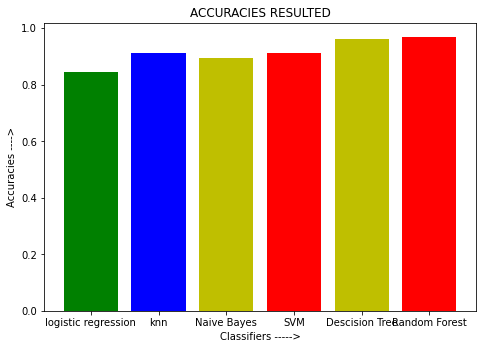

In [59]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algo = ['logistic regression','knn','Naive Bayes','SVM','Descision Tree','Random Forest']
accuracy = [modellc.score(x,y),modelknn.score(x,y),model.score(x,y),modelsvc.score(x,y),modeldt.score(x,y),modelrf.score(x,y)]
ax.bar(algo[0],accuracy[0],color = 'g')
ax.bar(algo[1],accuracy[1],color = 'b')
ax.bar(algo[2],accuracy[2],color = 'y')
ax.bar(algo[3],accuracy[3],color = 'r')
ax.bar(algo[4],accuracy[4],color = 'y')
ax.bar(algo[5],accuracy[5],color = 'r')
plt.xlabel('Classifiers ----->')
plt.ylabel('Accuracies ---->')
plt.title('ACCURACIES RESULTED')
plt.show()